In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [12]:
file = "../../../../../dataframes/ensu/df_09_transform.csv"

In [13]:
df <- read.csv(file = file)
data <- df
head(data)

BP1_1,BP1_2_01,BP1_2_02,BP1_2_03,BP1_2_04,BP1_2_05,BP1_2_06,BP1_2_07,BP1_2_08,BP1_2_09,⋯,BP3_1_09,BP3_1_10,BP3_1_11,BP3_1_12,BP3_1_13,BP3_1_14,BP3_1_15,BP3_1_99,BP3_2,EST
0.50000000,0.3605758,0.5000000,0.4959853,0.50000000,0.1756137,0.4634664,0.4422459,0.4219431,0.4515944,⋯,0.4144299,0.08092452,0.2370957,0.08998624,0.1893783,0.4837119,0.4974765,0.5,0.3077541,0.4268181
0.50000000,0.4999426,0.3520303,0.4959853,0.02707043,0.4194196,0.4634664,0.4422459,0.4219431,0.4515944,⋯,0.5000000,0.50000000,0.5000000,0.50000000,0.5000000,0.4837119,0.4974765,0.5,0.4997132,0.4268181
0.50000000,0.3605758,0.2017665,0.4959853,0.50000000,0.1756137,0.2829204,0.1249713,0.4219431,0.5000000,⋯,0.4144299,0.50000000,0.5000000,0.08998624,0.1893783,0.4837119,0.4974765,0.5,0.3077541,0.4268181
0.06429227,0.3605758,0.2017665,0.1272081,0.50000000,0.1756137,0.2829204,0.1249713,0.4219431,0.4515944,⋯,0.4144299,0.08092452,0.2370957,0.50000000,0.1893783,0.4837119,0.4974765,0.5,0.3077541,0.4268181
0.50000000,0.4999426,0.3520303,0.4959853,0.50000000,0.4194196,0.2829204,0.4422459,0.4219431,0.5000000,⋯,0.4144299,0.50000000,0.2370957,0.50000000,0.1893783,0.4837119,0.4974765,0.5,0.3077541,0.2036591
0.50000000,0.4999426,0.2017665,0.4959853,0.50000000,0.4194196,0.4634664,0.4422459,0.4219431,0.4515944,⋯,0.4144299,0.50000000,0.2370957,0.08998624,0.1893783,0.4837119,0.4974765,0.5,0.4997132,0.2036591


In [14]:
ncol(data)

[1] 49

In [15]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
#    print(names(data[column]))
    entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [16]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
head(df_entropy)

data_names,data_entropy
BP1_1,0.3908957
BP1_2_01,0.5955197
BP1_2_02,1.0920041
BP1_2_03,0.6153484
BP1_2_04,0.3667492
BP1_2_05,1.0220149


In [17]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
head(order_df_entropy)

,data_names,data_entropy
30,BP1_7_3,1.223448
14,BP1_3,1.110095
3,BP1_2_02,1.092004
11,BP1_2_10,1.091929
13,BP1_2_12,1.075959
48,BP3_2,1.074814


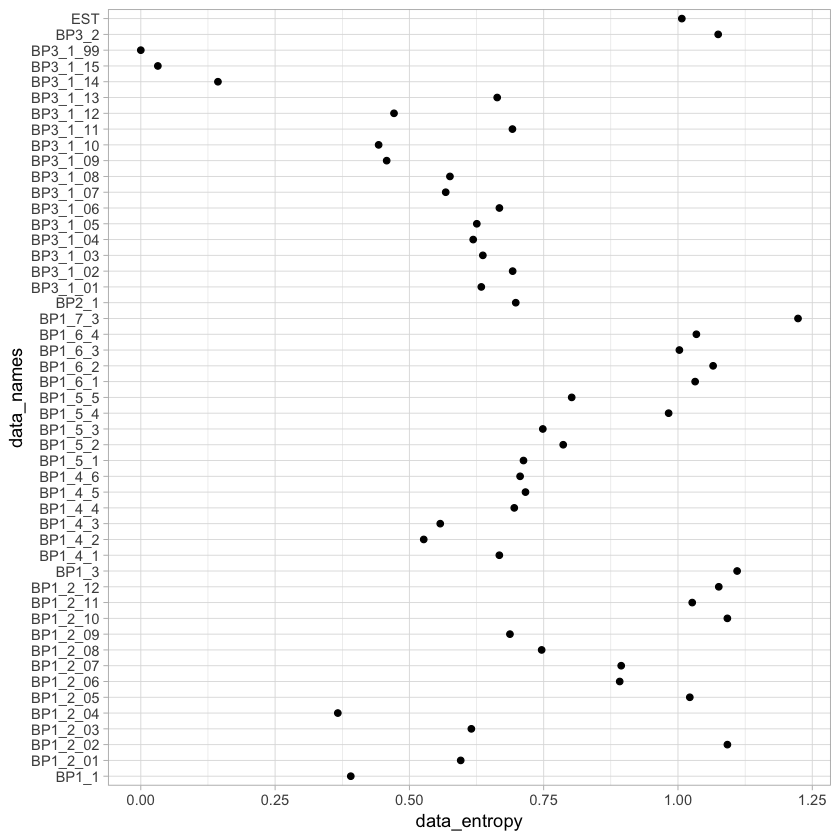

In [18]:
ggplot(df_entropy, 
       aes(y=data_names, x=data_entropy)) + geom_point() + theme_light()

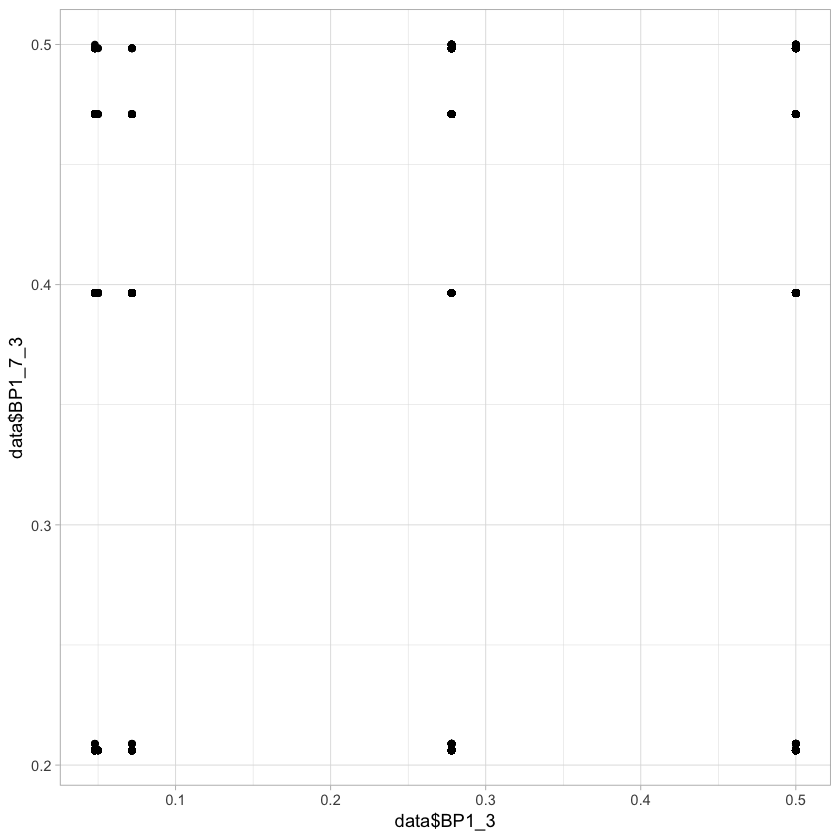

In [20]:
ggplot(data = data, 
       aes(y=data$BP1_7_3, 
           x=data$BP1_3)) + geom_point() + theme_light()

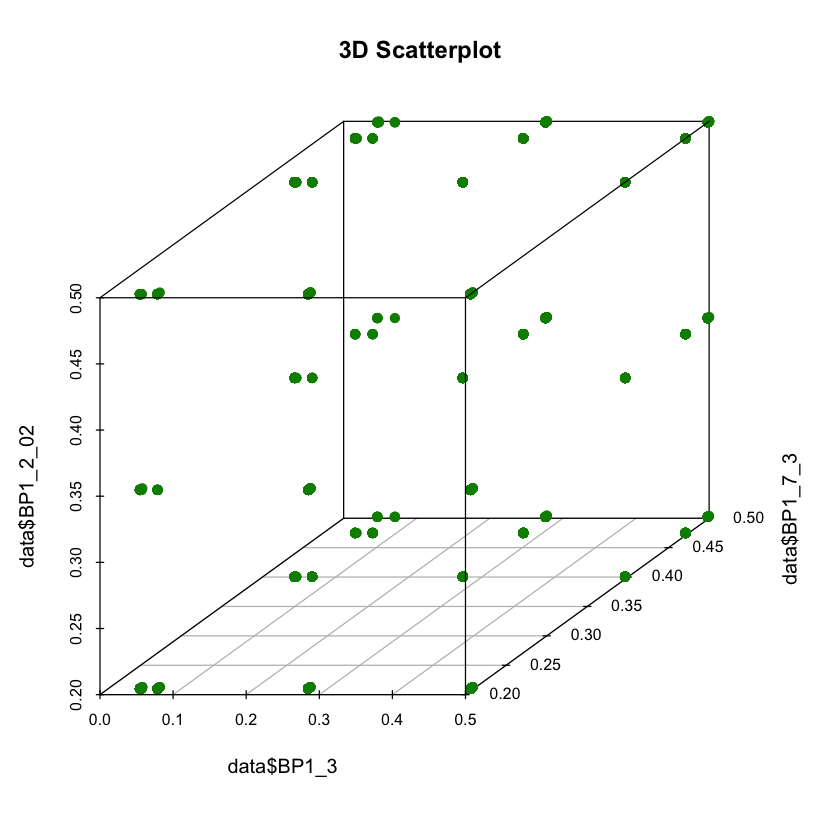

In [21]:
scatterplot3d(y=data$BP1_7_3, 
              x=data$BP1_3,
              z=data$BP1_2_02, pch = 19, color = "green4", main="3D Scatterplot")





In [24]:
write.csv(order_df_entropy, 
          file = '../../../../../dataframes/ensu/df_entropy_numerical.csv',
          row.names=FALSE)


In [25]:
data <- as.matrix(data)

In [30]:
range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- stats::kmeans(x = data, centers = k, nstart = 25)
    print(is.integer(kmeans$cluster))
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = data,
                                                    part = kmeans$cluster, 
                                                    #part = as.vector(as.integer(kmeans$cluster)), 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE


Warning message:
“did not converge in 10 iterations”

[1] TRUE


In [31]:
dunn_kmeans

[1] 0.1892918 0.1921021 0.1816066 0.2171113 0.1375685 0.1375685 0.1678583
[8] 0.1658678 0.1559782

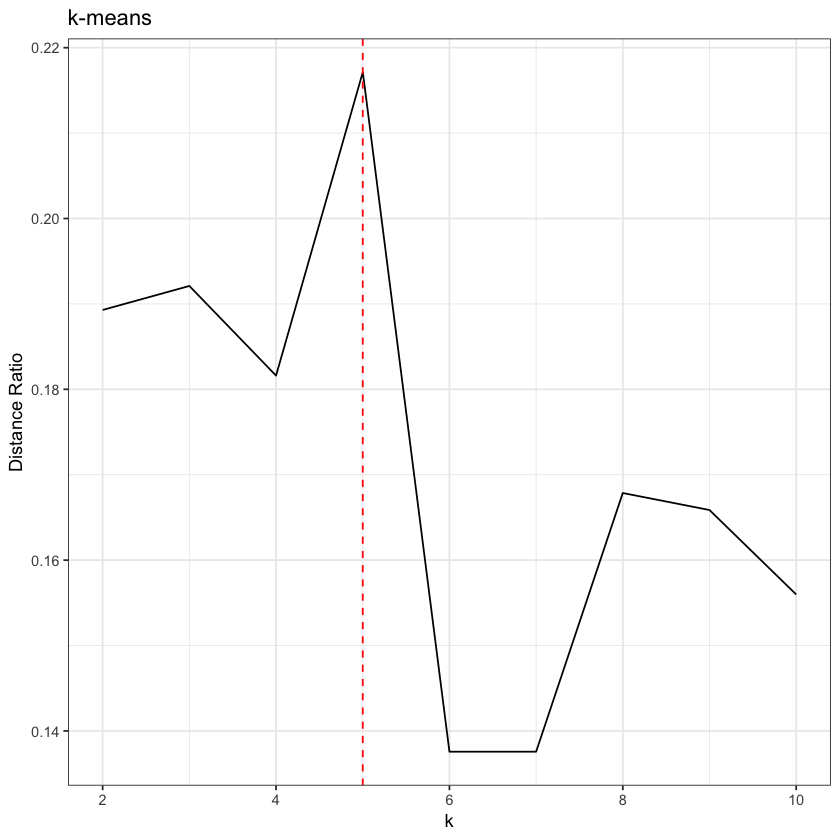

In [32]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'k-means', 
                                   xlab = 'k', 
                                   ylab = 'Distance Ratio')

plot_dunn_kmeans <- plot_dunn_kmeans  + 
  theme_bw() + #ylim(0,0.3) + 
  geom_vline(xintercept = range_k[which.max(dunn_kmeans)],
             linetype = 2, color='red')   
#ggsave(filename = "../../images/enh/dunn_kmeans_2_15.png", dpi = 300)

plot_dunn_kmeans

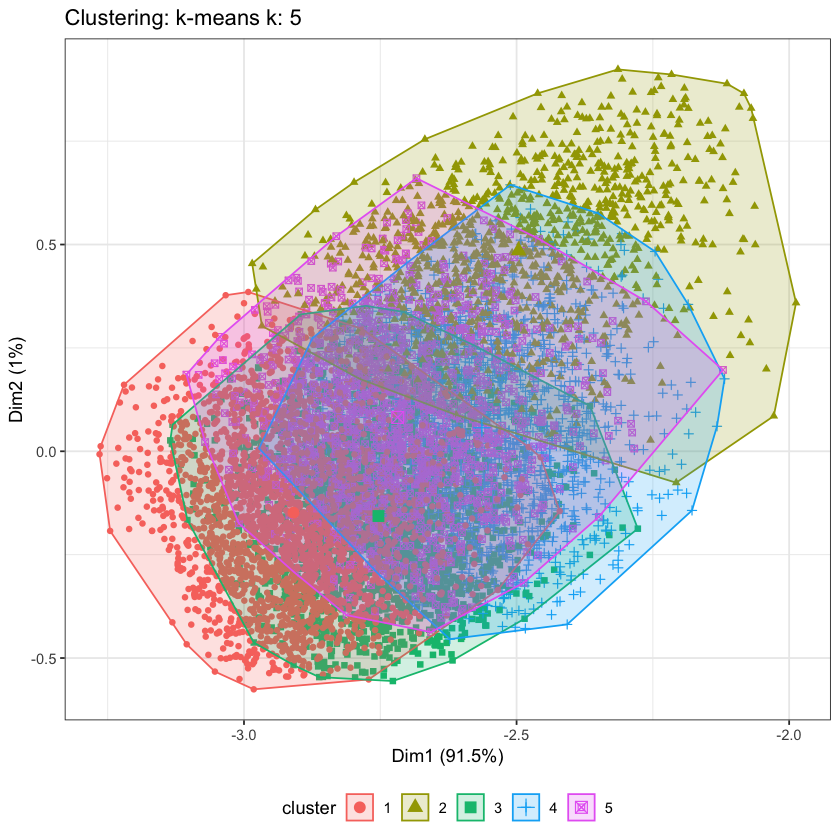

In [33]:
kmeans <- stats::kmeans(x = data, 
                        centers = range_k[which.max(dunn_kmeans)], 
                        nstart = 25)

plot_kmeans <- factoextra::fviz_cluster(object = kmeans,
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Clustering: k-means k:', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmeans <- plot_kmeans + 
  theme_bw() +
  theme(legend.position = 'bottom')  

plot_kmeans
